In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Webscrapign the dataset for this analysis will be done using this website http://www.cavpo.com/2022/03/FIFA.World.Cup.2022.BRA.Team.html which contains all the squad for each world cup.

In [678]:
df = pd.concat(pd.read_excel("C:\\Users\\FrancisOsei\\Downloads\\football.xlsx", sheet_name=None), ignore_index=True)
print(df)

     No Position        Player Name Date of birth (age)  Caps  Goals  \
0     1       GK    Wayne Hennessey     24-01-1987 (35)   108      0   
1    12       GK         Danny Ward     22-06-1993 (29)    28      0   
2    21       GK        Adam Davies     17-07-1992 (30)     4      0   
3     2       DF       Chris Gunter     21-07-1989 (33)   109      0   
4     3       DF      Neco Williams     13-04-2001 (21)    26      2   
..   ..      ...                ...                 ...   ...    ...   
825  11       FW    Ousmane Dembélé     15-05-1997 (25)    35      4   
826  12       FW  Randal Kolo Muani     05-12-1998 (24)     5      1   
827  19       FW      Karim Benzema     19-12-1987 (35)    97     37   
828  20       FW     Kingsley Coman     13-06-1996 (26)    46      5   
829  26       FW      Marcus Thuram     06-08-1997 (25)     9      0   

                    Club Nationality  
0      Nottingham Forest       Wales  
1         Leicester City       Wales  
2       Sheffield 

In [679]:
nat = np.unique(list(df["Nationality"]))

In [680]:
df1 = df[['Club', 'Nationality']]
df1

,Club,Nationality
0,Nottingham Forest,Wales
1,Leicester City,Wales
2,Sheffield United,Wales
3,Wimbledon,Wales
4,Nottingham Forest,Wales
...,...,...
825,Barcelona,France
826,Eintracht Frankfurt,France
827,Real Madrid,France
828,Bayern Munich,France


Dirk Baur and Sibylle Lehmann (2007) in their paper, "Does the Mobility of Football Players Affect the Success of the National Team?" gives an important prediction for FIFA competitions. According to their research, a national team that has a majority of players who play for both domestic and foreign football teams performs better in FIFA competitions. Numerous instances of national tournaments being won by nations where the majority of players compete in domestic leagues (Spain 2010, where 20 out of 23 players competed in the Spanish league) or by nations where the majority of players compete in international leagues (Argentine 2022, 25 out of 26 players played in international leagues).

Records show that in 2010, Barcelona and Real Madrid dominated club football, leading every national team coach to call players from both those teams and other Spanish teams. With 12 players representing the Spanish team and 11 representing other nations, Real Madrid and Barcelona have a combined 23 players called for the 2010 World Cup, making Spain the side with the largest foreign player pool. Italy again had the majority of its players selected from its domestic league for the 2006 World Cup, and three of its football clubs—Milan, Inter, and Juventus—were among the top five best in the world at the time, leading to the majority of coaches selecting players from those teams. Germany also had the most players in the German league in 2014, and two of its best teams, Bayern Munich and Borussia Dortmund, were champions league finalists in 2013. Due to this, players from other from those teams and other other Geramny teams were called up to represent their national teams. In 2018 and 2022, respectively, France and Argentina had players from a larger international player pool (i.e., their players shared clubs with the majority of players from other national teams competing in the tournament), but the majority of their players were not competing in the domestic leagues of their respective countries.Lastly, because the majority of their players play for average clubs with fewer players called to represent their national teams, the African and Asian national teams do poorly in FIFA world cup tournaments.

The suggested model employs network analysis to determine the nation's strongest squad based on eigen-vector centrality. There are two groups of nodes in the network (national teams and football clubs). If a player represents a nationality B while representing football club A, then the two nodes A and B are connected. A weight corresponding to the club's ranking in the club ranking is included with each edge. The best score comes from a solid team. The national team in this case with the highest eigenvector centrality suggests that its players are affiliated with clubs that have a larger international player pool, which in turn has more links. We are not going to include any other covariants propose by other reaserchers (age, country GDP, previous match history etc.) since national team coaches called diffrent players for different tournament depending on how important the tournament.

The number of football players who represent their national teams from the same club is shown in the cell below. Al-Sadd has 13 players who represent Qatar, Al-Hilal (12 players who represent Saudi Arabia), Bayern Munich has seven players who represent Germany, Ajax has seven players who represent the Netherlands, and Barcelona has seven players who represent Spain.
Then, a person might get the conclusion that Saudi Arabia, Germany, the Netherlands, or Spain are the next favourites, or that Qatar, with the majority of its players coming from the same squad, has the best chance of winning the competition. Does this player share a football club with other players who represent other national teams? is the question that inspired this new proposed concept.. To answer this question we introduced the Eigen centrality which determine how important a node is in a network. 
The majority of the players on the aforementioned teams may be from the same club, however those players may be the only ones representing their national teams from their football club. 

In [681]:
df2 = df1.groupby(df1.columns.tolist(), as_index=False).size()
df_sort = df2.sort_values('size',ascending=False)
df_sort

,Club,Nationality,size
32,Al-Sadd,Qatar,13
24,Al-Hilal,Saudi Arabia,12
103,Bayern Munich,Germany,7
12,Ajax,Netherlands,7
89,Barcelona,Spain,7
...,...,...,...
217,FC St. Pauli,Australia,1
215,FC Cincinnati,Costa Rica,1
214,FC Augsburg,Switzerland,1
213,FC Augsburg,Poland,1


In the next cell, we introduced club ranking fro all the football clubs. The detailed methology of the ranking method used can be found in https://footballdatabase.com/methodology

In [682]:
df3 = pd.read_excel("C:\\Users\\FrancisOsei\\Downloads\\foot.xlsx")
df3

,Club,Nationality,size,Rank
0,1. FC Köln,Tunisia,1,1574
1,1899 Hoffenheim,Crotia,1,1511
2,1899 Hoffenheim,Denmark,1,1511
3,AEK Athens,Crotia,1,1593
4,AEK Athens,Iran,2,1593
...,...,...,...,...
586,Young Boys,Cameroon,1,1646
587,Young Boys,Switzerland,2,1646
588,Zamalek,Tunisia,1,1534
589,Zenit Saint Petersburg,Crotia,1,1682


Here we tried to multiply the number of players from a club representing a national team by the the club ranking score. This method failed to converge when the values are used as edge weights.  

In [683]:
#from sklearn.preprocessing import minmax_scale
df3["weight"] = df3["size"]*df3["Rank"]
#df3['Rank_norm'] = minmax_scale(df3['Rank'])
df3.head()

,Club,Nationality,size,Rank,weight
0,1. FC Köln,Tunisia,1,1574,1574
1,1899 Hoffenheim,Crotia,1,1511,1511
2,1899 Hoffenheim,Denmark,1,1511,1511
3,AEK Athens,Crotia,1,1593,1593
4,AEK Athens,Iran,2,1593,3186


In the next cell, we generated a weighted graph with the club ranking score as the weight.

In [684]:
import networkx as nx
G = nx.Graph()
G = nx.from_pandas_edgelist(df3, 'Club', 'Nationality',edge_attr="Rank")

The next cell shows the degree distribution of the network. The degree distribation of the our network follows the power law distribution which is the case for most real world network

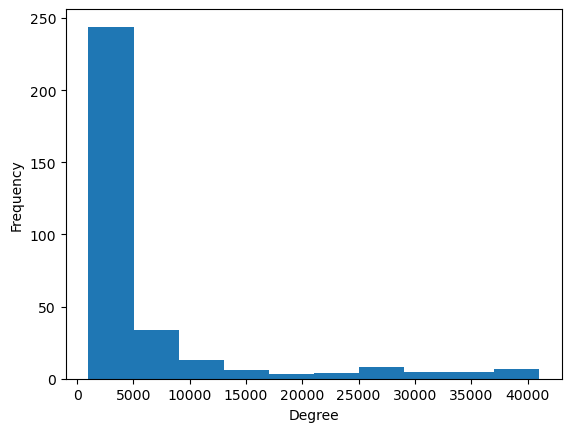

In [685]:
degrees = [G.degree(n, weight="Rank") for n in G.nodes()]
plt.hist(degrees)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

In the network below, national teams are displayed by the red node and the green nodes represent the various football clubs.

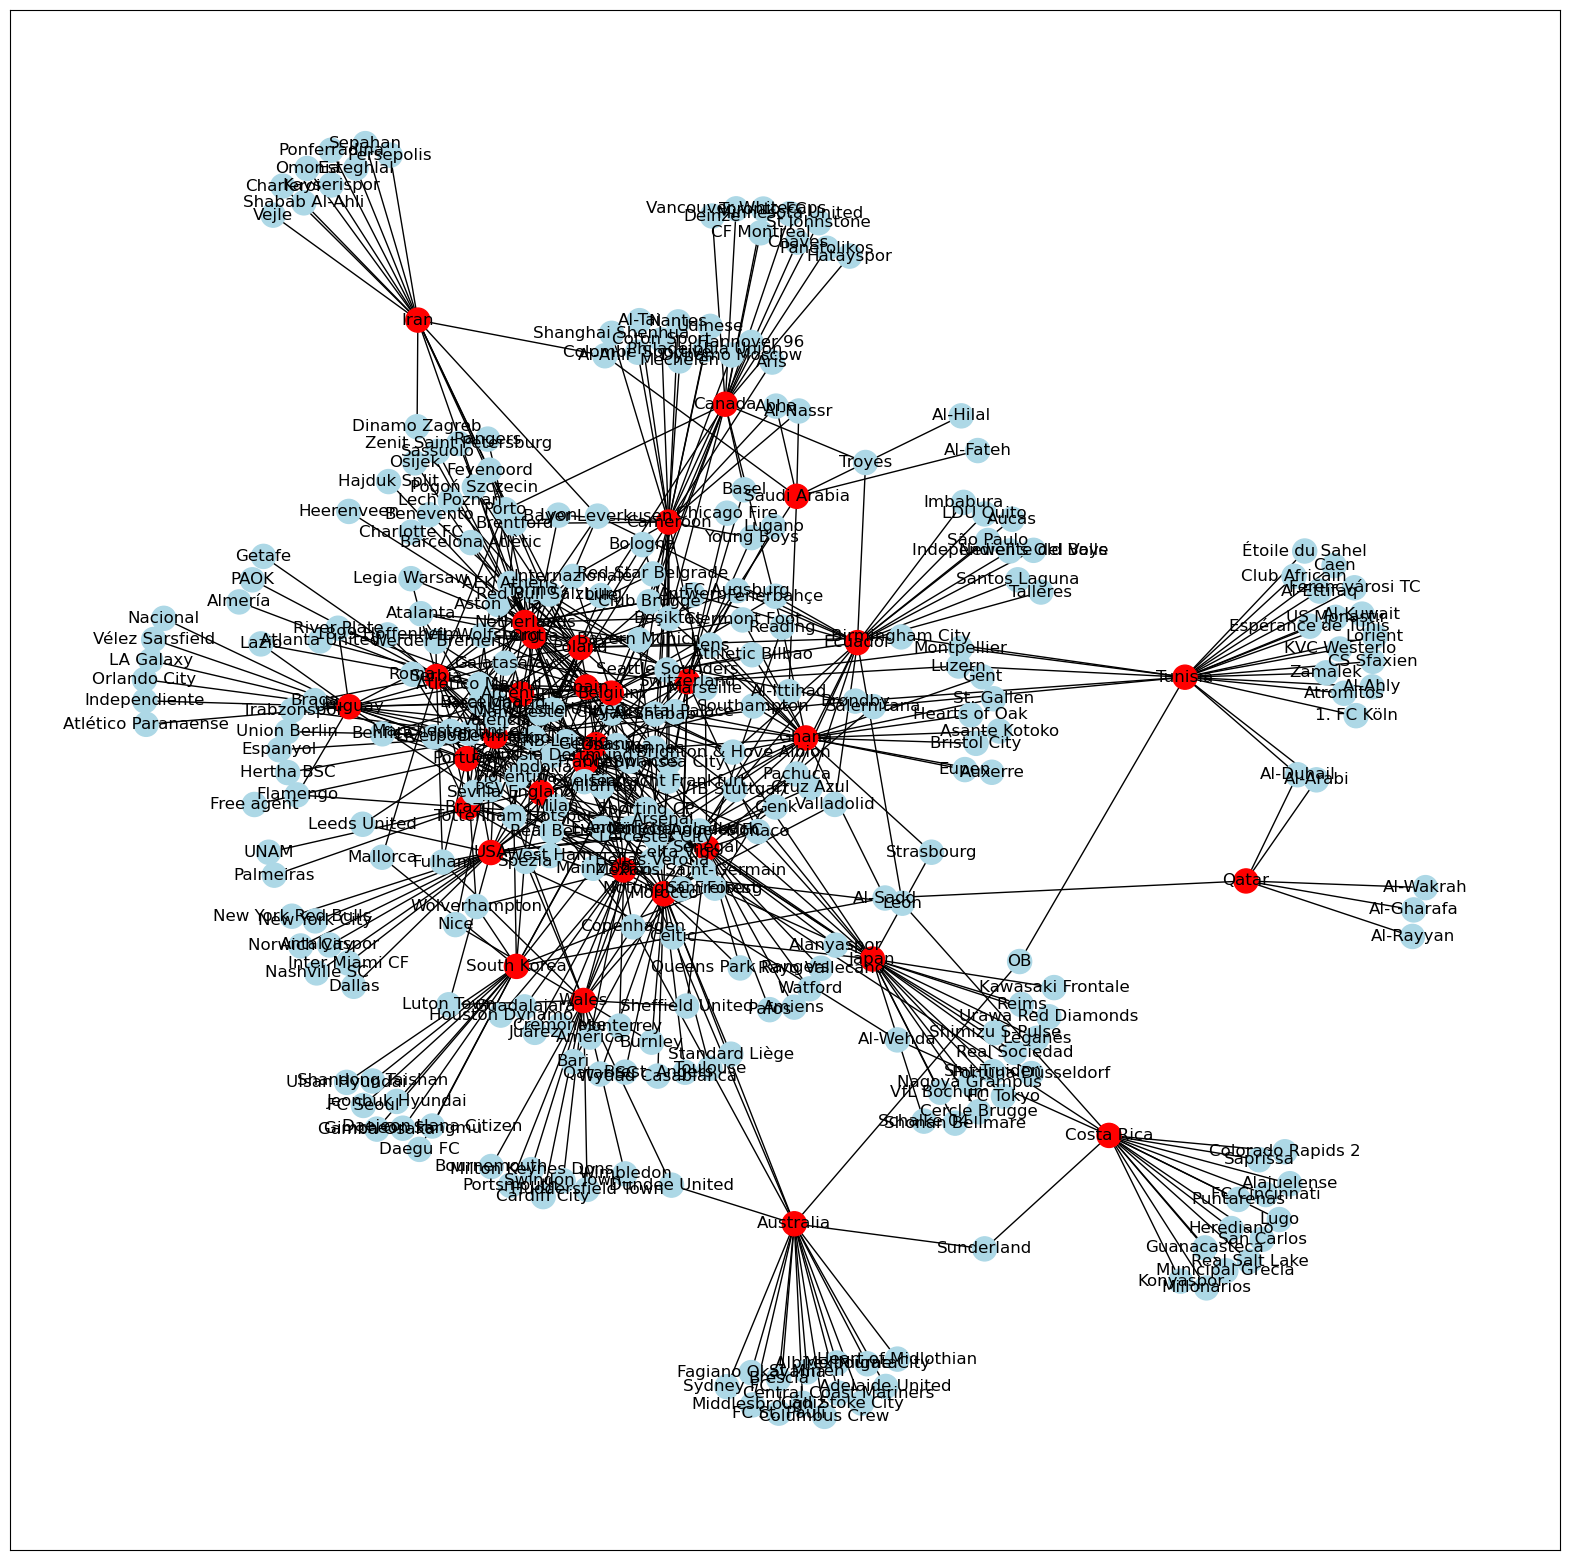

In [686]:
from matplotlib.pyplot import figure
figure(figsize=(20, 20))
color_map = ['red' if node in nat else "lightblue" for node in G]        
graph = nx.draw_networkx(G,node_color=color_map)

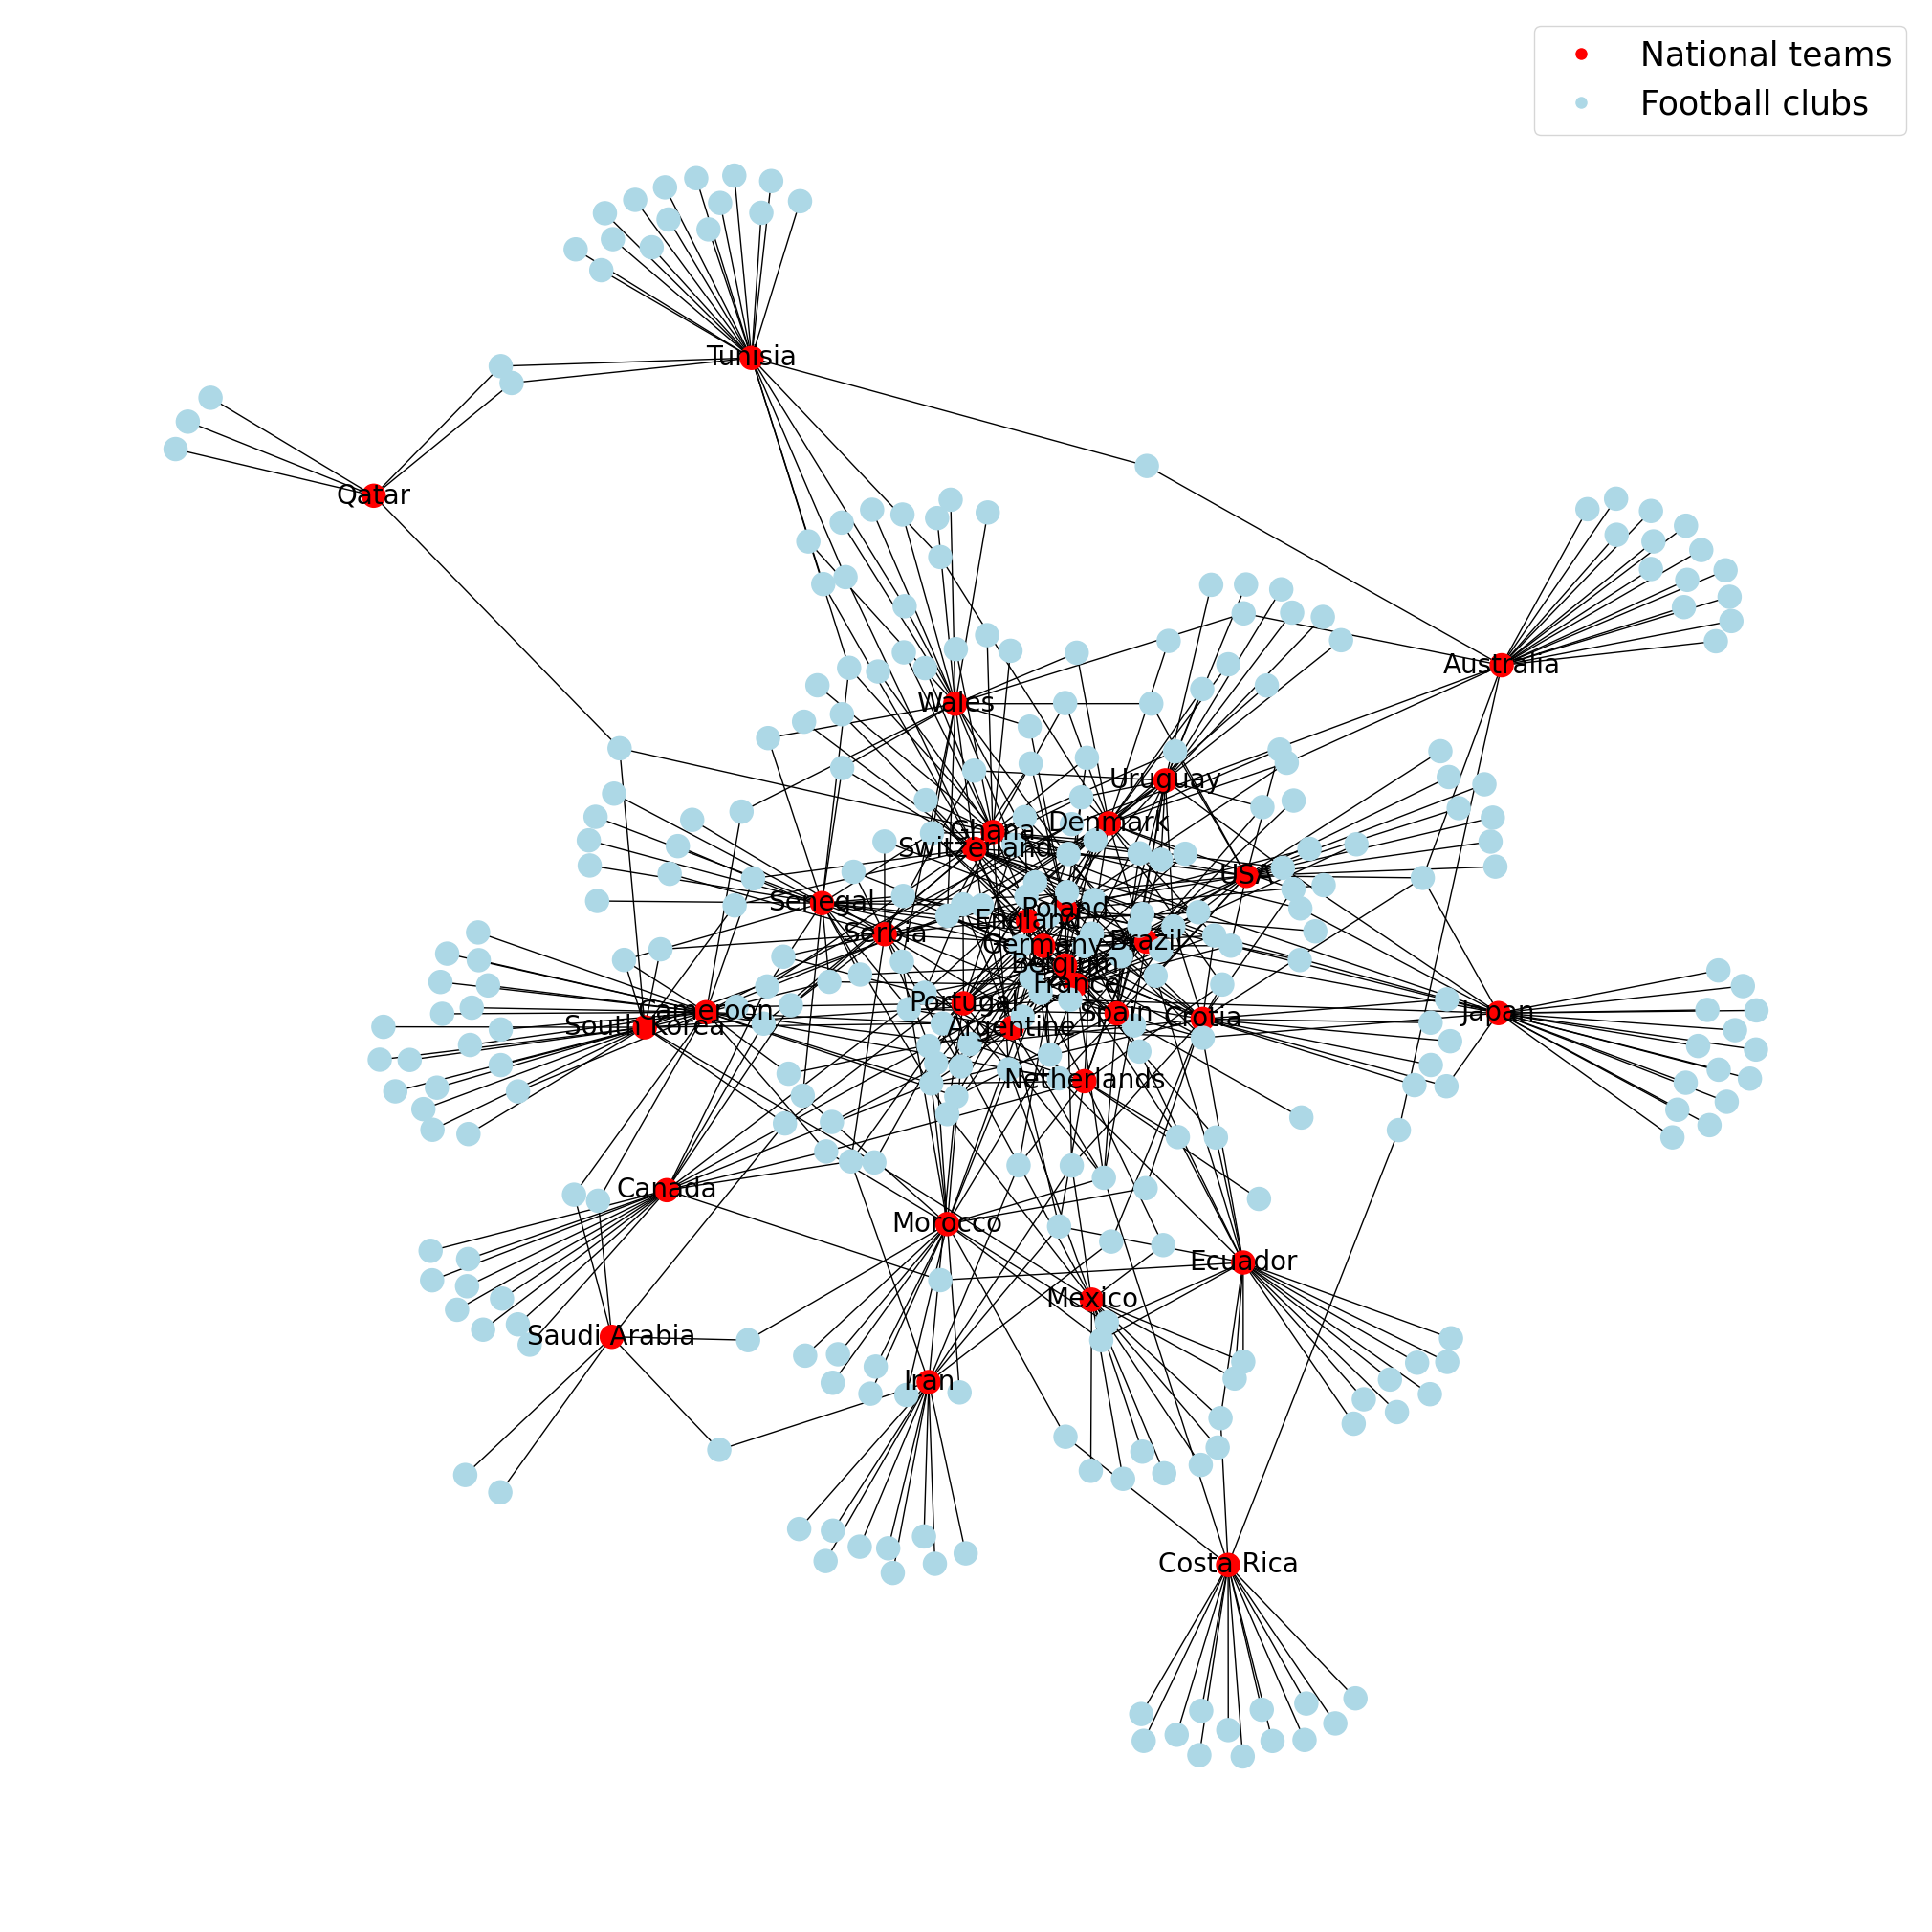

In [687]:
import networkx as nx
import matplotlib.pyplot as plt



# Define node colors
node_colors = ['red' if node in nat else 'lightblue' for node in G.nodes()]

# Create a figure and set its size
plt.figure(figsize=(20, 20))

# Draw the graph with node colors and labels
pos = nx.spring_layout(G)  # Compute the layout positions
nx.draw(G, pos, node_color=node_colors, with_labels=False)

# Add labels to nodes in the 'nat' list
labels = {node: node if node in nat else '' for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=labels,font_size=20)

# Add legend for node colors
legend_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', markersize=10)
]
plt.legend(legend_handles, ['National teams', 'Football clubs'], title='',fontsize=25)

# Display the graph
plt.show()


In [688]:
nat = np.unique(list(df3["Nationality"]))

In [689]:
degree_centrality = nx.eigenvector_centrality(G,weight = "Rank",max_iter= 10000,tol = 0.01)
for node in sorted(nat, key=degree_centrality.get, reverse=True):
  print(node, degree_centrality[node])

France 0.19928848901410376
Brazil 0.18046746043074913
Crotia 0.1547482593312144
Argentine 0.1533086909914686
Uruguay 0.14225263520527665
Denmark 0.14190747762366374
Belgium 0.14113787079507803
Germany 0.13935043325804528
Spain 0.1371622642680597
England 0.12677637170378148
Portugal 0.12576530085017057
Switzerland 0.12420259536822299
Netherlands 0.11771002552966899
Senegal 0.11357178685358404
USA 0.09424399331862908
Poland 0.08037777899086156
Ghana 0.07754886145627243
Morocco 0.07615175542097576
Cameroon 0.06905493325270089
Japan 0.06777482954478758
Serbia 0.05348751630755451
Wales 0.05047629250263295
South Korea 0.03930040804365536
Canada 0.03488003133972422
Ecuador 0.029284838118368076
Mexico 0.02624677226661657
Iran 0.021540187696736744
Costa Rica 0.015639095950001125
Australia 0.009318104289685512
Tunisia 0.007629998811670245
Saudi Arabia 0.003491098984969195
Qatar 0.0013902340341414006


In [690]:
0.17475991291983003/(0.193+0.189+0.174+0.171+0.159+0.158+0.158+0.156+0.148+0.146+0.145+0.142+0.137+0.132+0.111+0.110+0+.110+0.104+0.095+0.086+0.068+0.068+0.051+0.051+0.048)

0.05619289804496142

In [691]:
total_centrality = sum(degree_centrality.values())
total_centrality

10.52833518318636

We can see the the eigen vector centrality score that the defending champion France was faviourite to win the 2022 world cup. 
Using the the ranking from this approach we can have the following analysis from group stage to the finals of the 2022 FIFA men world cup

# Random walk approach for match rating

In [718]:
import random
# choose two TEAMS from the graph
node1 = 'X'
node2 = 'Y'

# perform a random walk from node1
probabilities = {node: 0 for node in G.nodes()}
probabilities[node1] = 1.0
for i in range(1000):
    current_node = node1
    for j in range(100):
        neighbors = list(G.neighbors(current_node))
        if len(neighbors) == 0:
            break
        weights = [G[current_node][neighbor]['Rank'] for neighbor in neighbors]
        next_node = random.choices(neighbors, weights=weights)[0]
        probabilities[next_node] += 1.0
        current_node = next_node

# normalize probabilities
total = sum(probabilities.values())
probabilities = {node: prob / total for node, prob in probabilities.items()}

# calculate probability of strength for team A against team B based on eigenvector centrality
strength_prob = probabilities[node1] * degree_centrality[node1] /(probabilities[node1] * degree_centrality[node1]+(probabilities[node2] * degree_centrality[node2]))
print(f"Probability that {node1} is stronger than {node2}: {round(strength_prob,2)}")
strength_prob1 = probabilities[node2] * degree_centrality[node2] /(probabilities[node1] * degree_centrality[node1]+(probabilities[node2] * degree_centrality[node2]))
print(f"Probability that {node2} is stronger than {node1}: {round(strength_prob1,2)}")


Probability that Crotia is stronger than Argentine: 0.61
Probability that Argentine is stronger than Crotia: 0.39


In [719]:
n1 = (0.48)/(0.51+0.48)

In [ ]:
n2= (0.51)/()
n2

# Group stages


Group A. 

Netherland and Senegal

Group B.

England  and USA

Group C

Argentine and Poland

Group D

France and Denmark

Group E

Geramany and Spain

Group F

Crotia and Belgium

Group G

Brazil and Switzerland

Group H

Uruguay and Portugal

# Round of 16 matches

1. Netherlands Vs USA

2. Argentina Vs Denmark

3. Germany Vs Belgium

4. Brazil Vs Portugal

5. England Vs Senegal

6. France Vs Poland

7. Crotia Vs Spain

9. Uruguay Vs Switzerland

# Quater Final

1. Netherland Vs Argentine
2. Germany Vs Brazil
3. France Vs England
4. Crotia Vs Uruguay

# Semi Final

1. Brazil Vs  Argentine
2. France Vs Crotia

# Final

France Vs Brazil

# Winner

France

# other codes 

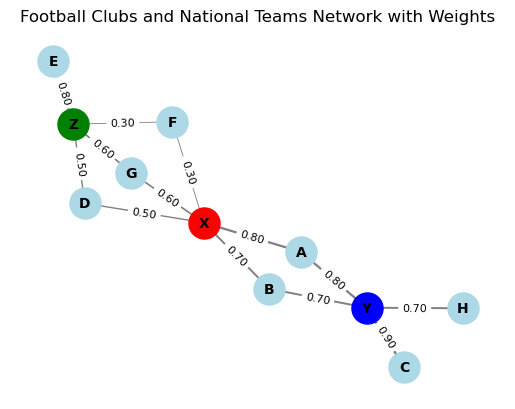

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph object
G = nx.Graph()

# Add nodes for football clubs
clubs = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
G.add_nodes_from(clubs)

# Add nodes for national teams
teams = ['X', 'Y', 'Z']
G.add_nodes_from(teams)

# Define the weights for the edges
weights = {('A', 'X'): 0.8, ('B', 'X'): 0.7, ('B', 'Y'): 0.7, ('C', 'Y'): 0.9,
           ('D', 'Z'): 0.5, ('E', 'Z'): 0.8, ('F', 'Z'): 0.3, ('G', 'X'): 0.6,
           ('G', 'Z'): 0.6, ('H', 'Y'): 0.7,('A', 'Y'):0.8,('D', 'X'): 0.5,('F', 'X'): 0.3}

# Create edges between clubs and national teams with weights
edges = [(club, team, {'weight': weight}) for (club, team), weight in weights.items()]
G.add_edges_from(edges)

# Assign colors to national teams
team_colors = {'X': 'red', 'Y': 'blue', 'Z': 'green'}

# Plot the network graph
pos = nx.spring_layout(G)  # Positions of the nodes

# Draw clubs
nx.draw_networkx_nodes(G, pos, nodelist=clubs, node_color='lightblue', node_size=500)
# Draw national teams with different colors
for team in teams:
    nx.draw_networkx_nodes(G, pos, nodelist=[team], node_color=team_colors[team], node_size=500)

# Draw edges with weights
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[d['weight']*2 for _, _, d in edges], edge_color='gray')

# Draw edge labels
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
plt.title("Football Clubs and National Teams Network with Weights")
plt.axis('off')
plt.show()


In [18]:
import networkx as nx
import numpy as np

# Create a graph object
G = nx.Graph()

# Add nodes for football clubs
clubs = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
G.add_nodes_from(clubs)

# Add nodes for national teams
teams = ['X', 'Y', 'Z']
G.add_nodes_from(teams)

# Define the weights for the edges
weights = {('A', 'X'): 0.8, ('B', 'X'): 0.7, ('B', 'Y'): 0.7, ('C', 'Y'): 0.9,
           ('D', 'Z'): 0.5, ('E', 'Z'): 0.8, ('F', 'Z'): 0.3, ('G', 'X'): 0.6,
           ('G', 'Z'): 0.6, ('H', 'Y'): 0.7,('A', 'Y'):0.8,('D', 'X'): 0.5,('F', 'X'): 0.3}


# Create edges between clubs and national teams with weights
edges = [(club, team, {'weight': weight}) for (club, team), weight in weights.items()]
G.add_edges_from(edges)

# Create a mapping of nodes to indices
node_indices = {node: index for index, node in enumerate(G.nodes)}

# Function to compute the probability of reaching a team from another team
def compute_probability(graph, start_team, target_team, num_steps):
    # Create a matrix to store the transition probabilities
    num_nodes = len(graph.nodes)
    transition_matrix = np.zeros((num_nodes, num_nodes))

    # Assign the transition probabilities based on the edge weights
    for u, v, data in graph.edges(data=True):
        u_index = node_indices[u]
        v_index = node_indices[v]
        transition_matrix[u_index][v_index] = data['weight']
        transition_matrix[v_index][u_index] = data['weight']  # Consider both directions

    # Normalize the transition probabilities to create a stochastic matrix
    row_sums = transition_matrix.sum(axis=1, keepdims=True)
    row_sums[row_sums == 0] = 1  # Avoid division by zero
    transition_matrix = transition_matrix / row_sums

    # Perform the random walk to compute the probability
    current_probs = np.zeros(num_nodes)
    current_probs[node_indices[start_team]] = 1

    for _ in range(num_steps):
        current_probs = np.dot(current_probs, transition_matrix)

    probability = current_probs[node_indices[target_team]]
    return 0 if np.isnan(probability) else probability

# Compute the probability of each national team winning a match against each other
for team1 in teams:
    for team2 in teams:
        if team1 != team2:
            probability = compute_probability(G, team1, team2, num_steps=10)
            print(f"The probability of {team1} winning against {team2} is {probability:.4f}")


The probability of X winning against Y is 0.3636
The probability of X winning against Z is 0.2804
The probability of Y winning against X is 0.3401
The probability of Y winning against Z is 0.1869
The probability of Z winning against X is 0.3697
The probability of Z winning against Y is 0.2633


# Euro2020

In [11]:
excel_file = "C:\\Users\\portia's laptop\\Downloads\\euro2020.xlsx"
dfs = pd.read_excel(excel_file, sheet_name=None)
df1 = pd.concat(dfs.values(), ignore_index=True) 
df1.head()

,No.,Pos.,Player,Date of birth (age),Caps,Goals,Club,Country
0,1,GK,Wayne Hennessey,24 January 1987 (aged 34),96,0,Crystal Palace,Wales
1,2,DF,Chris Gunter,21 July 1989 (aged 31),101,0,Charlton Athletic,Wales
2,3,DF,Neco Williams,13 April 2001 (aged 20),11,1,Liverpool,Wales
3,4,DF,Ben Davies,24 April 1993 (aged 28),60,0,Tottenham Hotspur,Wales
4,5,DF,Tom Lockyer,3 December 1994 (aged 26),13,0,Luton Town,Wales


In [10]:
log = pd.read_excel("C:\\Users\\portia's laptop\\Desktop\\MA Grytzka\\logability.xlsx")
log.head()

,Team,logability
0,Italy,0.487169
1,Switzerland,-0.180838
2,Turkey,-0.087038
3,Wales,-0.392210
4,Belgium,0.729862


In [12]:
df2 = df1.groupby(df1.columns.tolist(), as_index=False).size()
df_sort = df2.sort_values('size',ascending=False)
df_sort

,No.,Pos.,Player,Date of birth (age),Caps,Goals,Club,Country,size
0,1,GK,Alexander Schlager,1 February 1996 (aged 25),6,0,LASK,Austria,1
417,18,FW,Dominic Calvert-Lewin,16 March 1997 (aged 24),9,4,Everton,England,1
410,18,DF,Jason Denayer,28 June 1995 (aged 25),25,1,Lyon,Belgium,1
411,18,DF,Jere Uronen,13 July 1994 (aged 26),49,1,Genk,Finland,1
412,18,DF,Jordi Alba,21 March 1989 (aged 32),72,8,Barcelona,Spain,1
...,...,...,...,...,...,...,...,...,...
208,9,FW,Roman Yaremchuk,27 November 1995 (aged 25),24,8,Gent,Ukraine,1
209,9,FW,Romelu Lukaku,13 May 1993 (aged 28),93,60,Internazionale,Belgium,1
210,9,FW,Róbert Boženík,18 November 1999 (aged 21),16,4,Feyenoord,Slovakia,1
211,9,FW,Tyler Roberts,12 January 1999 (aged 22),14,0,Leeds United,Wales,1


In [13]:
df1 = df[['Club', 'Country']]
df2 = df1.groupby(df1.columns.tolist(), as_index=False).size()
df_sort = df2.sort_values('size',ascending=False)
df_sort
df2.to_excel("output.xlsx")

In [16]:
df3 = pd.read_excel("output.xlsx")
df3["weight"] = df3["size"]*df3["size"]
df3

,Unnamed: 0,Club,Country,size,weight
0,0,1. FC Köln,Slovakia,1,1
1,1,1899 Hoffenheim,Austria,3,9
2,2,1899 Hoffenheim,Crotia,1,1
3,3,1899 Hoffenheim,Czech Republic,1,1
4,4,1899 Hoffenheim,Denmark,1,1
...,...,...,...,...,...
438,438,Zenit Saint Petersburg,Russia,5,25
439,439,Zürich,Switzerland,1,1
440,440,Újpest,North Macedonia,1,1
441,441,İstanbul Başakşehir,Belgium,1,1


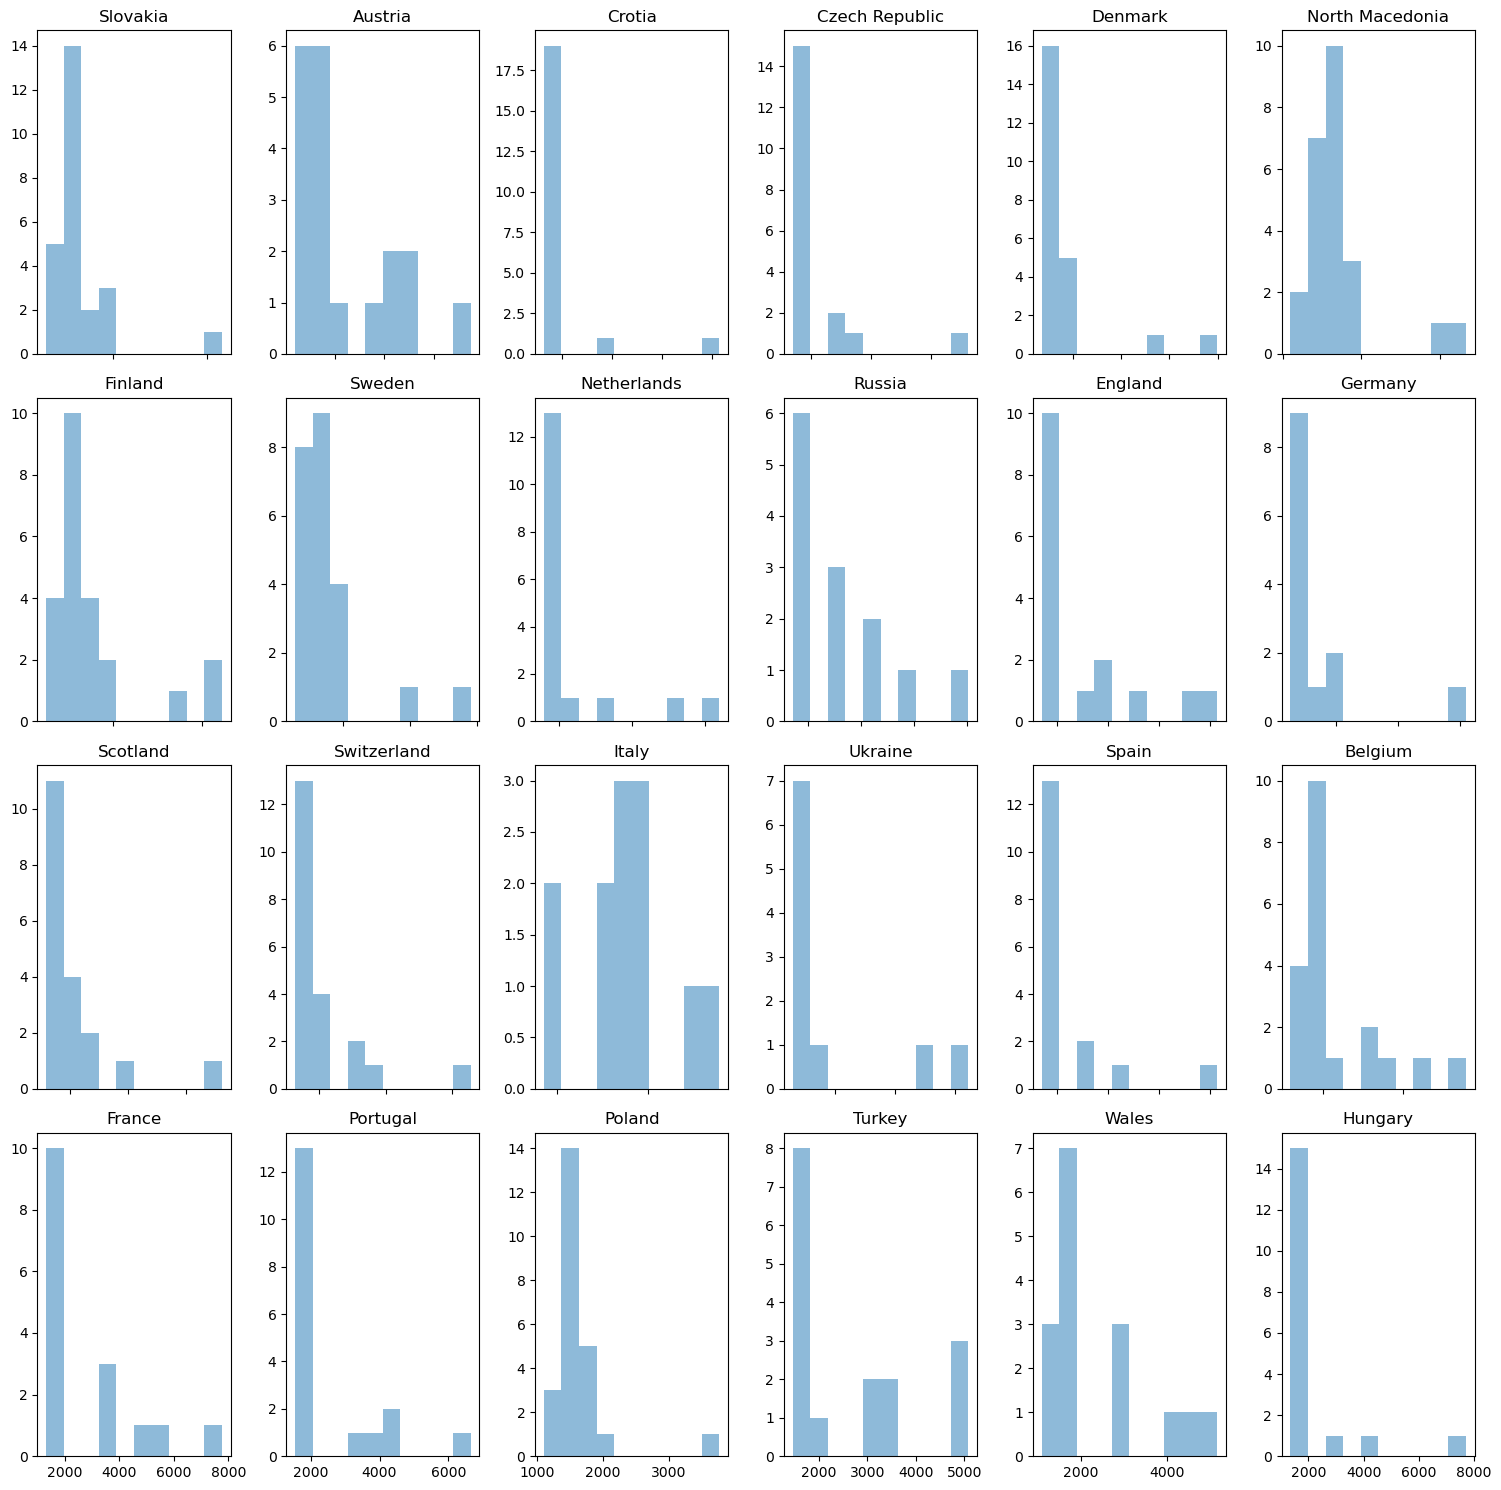

In [151]:
import pandas as pd
import matplotlib.pyplot as plt



# Define the number of rows and columns for the grid
num_rows = 4
num_cols = 6

# Get unique categories from the categorical column
categories = df3['Nationality'].unique()

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes array
axes = axes.flatten()

# Iterate over the categories and plot histograms
for i, category in enumerate(categories):
    # Filter the dataframe for the current category
    subset_df = df3[df3['Nationality'] == category]
    
    # Select the corresponding subplot
    ax = axes[i]
    
    # Plot the histogram for the float column
    ax.hist(subset_df['weight'], bins=10, alpha=0.5)
    
    # Set the title for each subplot
    ax.set_title(category)
    
    # Remove the x-axis label from all but the bottom row
    if i < num_cols * (num_rows - 1):
        ax.set_xticklabels([])
    
# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()
